In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ CSV 불러오기
df = pd.read_csv('차부필드클레임2425.csv', encoding='utf-8')

# 2️⃣ 컬럼명 정리 (줄바꿈, 공백 제거)
df.columns = df.columns.str.replace('\n', '').str.strip()

# 3️⃣ 정리된 컬럼명 확인
print("✅ 정리된 컬럼명:", df.columns.tolist())


✅ 정리된 컬럼명: ['클레임유형', '공장', '생산법인', '판매지역', '수출국가', '해외내수', '등급', '귀책구분', '최종확정', '차종', 'RO번호', '차대번호', '원인부품분류코드', '부품번호', '부품대분류', '부품중분류', '부품명', '직거래/직개발', '불량구분', '부품대분류', '부품계통', '현상명(재분류)', 'HKMC 현상', 'HKMC 현상명', 'HKMC 원인', 'HKMC 원인명', '파셜화대상여부', 'Assy/Partial', 'DTC 1번째', 'DTC 2번째', 'DTC 3번째', '생산년월일', '생산월', '생산년', '판매년월일', '판매월', '판매년', '선적년월일', '선적월', '정비등록년월일', '정비등록월', '정비확정년월일', '정비확정월', '데이터적재년월일', '데이터적재년월', '실적년', '총주행거리(Km)', '판매소요일수', '차량사용일수', '차량사용기준개월', '정비작업코드', '정비망코드', '정비망', '해외딜러코드', '수리권역', '수리지역', '직/간접망구분', '정비사업소명', '정비특이사항코드', '정비특이사항제목명', '품질특이사항내용', '품질특이사항(번역)', '클레임발생구분', '확정부품금액', '확정부품금액.1', '수리금액', '외주금액', '차대번호엔진코드', '변속기코드', '엔진넘버', '엔진명', '엔진생산일', '트랜스미션번호', '개발업체코드', '납품업체', '3M 100만', "'12M 100만", '36M 100만', '이의제기', '이의제기(기타)', '실적확정', '신규RO조합']


C:\Users\75050\AppData\Local\Temp\ipykernel_13716\2473046523.py:5: DtypeWarning: Columns (61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('차부필드클레임2425.csv', encoding='utf-8')


C:\Users\75050\AppData\Local\Temp\ipykernel_13716\1034145754.py:5: DtypeWarning: Columns (61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('차부필드클레임2425.csv', encoding='utf-8')


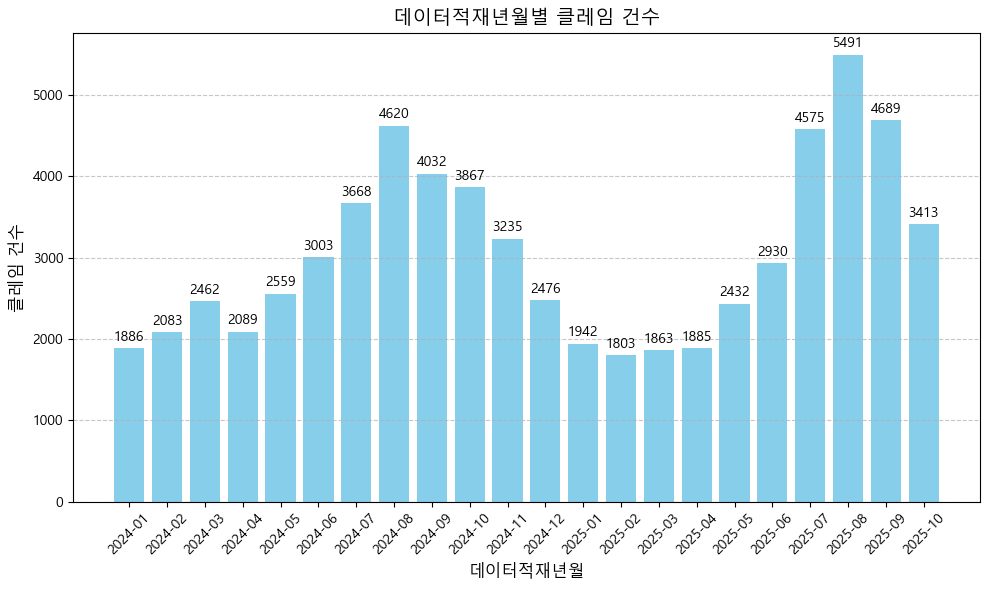

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ CSV 불러오기
df = pd.read_csv('차부필드클레임2425.csv', encoding='utf-8')

# 2️⃣ 컬럼명 정리
df.columns = df.columns.str.replace('\n', '').str.strip()

# 3️⃣ 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기준
plt.rcParams['axes.unicode_minus'] = False

# 4️⃣ '데이터적재년월' 공백 제거
df['데이터적재년월'] = df['데이터적재년월'].astype(str).str.strip()

# 5️⃣ 클레임 건수 집계
if '클레임건수' in df.columns:
    claim_counts = df.groupby('데이터적재년월')['클레임건수'].sum()
else:
    claim_counts = df['데이터적재년월'].value_counts()

# 6️⃣ 'YY-MMM' 형식 변환 함수
def convert_yy_mmm_to_date(s):
    try:
        return pd.to_datetime(s, format='%y-%b')
    except:
        return pd.NaT

claim_counts.index = claim_counts.index.map(convert_yy_mmm_to_date)

# 7️⃣ NaT 제거 + 오름차순 정렬
claim_counts = claim_counts.dropna().sort_index()

# 8️⃣ x축 라벨 포맷 ('YYYY-MM')
x_labels = claim_counts.index.strftime('%Y-%m')

# 9️⃣ 그래프 그리기
plt.figure(figsize=(10,6))
plt.bar(x_labels, claim_counts.values, color='skyblue')
plt.title('데이터적재년월별 클레임 건수', fontsize=14)
plt.xlabel('데이터적재년월', fontsize=12)
plt.ylabel('클레임 건수', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

bars = plt.bar(x_labels, claim_counts.values, color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + max(claim_counts.values)*0.01,  # 막대 위 살짝 띄워서 표시
             f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
s


In [16]:
print(df['데이터적재년월'].unique()[:20])  # 앞 20개 값만 출력


['25-Oct' '25-Sep' '25-Aug' '25-Jul' '25-Jun' '25-May' '25-Apr' '25-Mar'
 '25-Feb' '25-Jan' '24-Dec' '24-Nov' '24-Oct' '24-Sep' '24-Aug' '24-Jul'
 '24-Jun' '24-May' '24-Apr' '24-Mar']
